<a href="https://colab.research.google.com/github/verimuch/ML_Python_Yonsei/blob/main/exam_%EC%A0%95%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 환경설정

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
# 데이터 다운로드하기
df = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")


In [ ]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
## 데이터 전처리

# 나이를 30으로 대체 (대체한 것을 즉시 반영했다)
df.Age.fillna(30, inplace=True)

# Embarked (항구명) 결측치를 "S"로 대체
df.Embarked.fillna('S', inplace=True)

# 사용하지 않을 컬럼 4개를 삭제한 데이터프레임을 만들고 백업한다
df = df[df.columns.difference(['PassengerId','Name','Ticket','Cabin'])]

# 선실등급, 성별, 항구명을 원핫 인코딩한다
df = pd.get_dummies(df, columns=['Pclass','Sex','Embarked'])

# 요금(Fare)은 로그를 취한 값을 사용한다
# df["Fare"] = np.log(df.Fare +1)

# 연속형 변수에 min-max 스케일링을 적용한다
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df.loc[:][['Age','Fare','SibSp','Parch']] = scaler.fit_transform(df[['Age','Fare','SibSp','Parch']])

# 데이터분석에 사용할 X와 y 얻기
X = df[df.columns.difference(['Survived'])]
y = df.Survived

# X, y 확인하기
print(y[:5])
X[:5].T

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


,0,1,2,3,4
Age,0.271174,0.472229,0.321438,0.434531,0.434531
Embarked_C,0.000000,1.000000,0.000000,0.000000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.000000,0.000000
Embarked_S,1.000000,0.000000,1.000000,1.000000,1.000000
Fare,0.014151,0.139136,0.015469,0.103644,0.015713
Parch,0.000000,0.000000,0.000000,0.000000,0.000000
Pclass_1,0.000000,1.000000,0.000000,1.000000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.000000,0.000000
Pclass_3,1.000000,0.000000,1.000000,0.000000,1.000000
Sex_female,0.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
df.shape

(891, 13)

In [ ]:
## X와 y를 훈련 데이터와 검증 데이터로 나눈다 (디폴트 비율은 75%: 25%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, shuffle=True)

# 훈련 및 검증 데이터 갯수 확인
len(X_train), len(X_test)

(668, 223)

In [ ]:
## 선형 분류 모델로 SGDClassifier를 사용

# 모델 생성
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()

# 학습 데이터를 사용하여 학습을 수행한다
model.fit(X_train, y_train)

# 검증 데이터를 사용하여 모델의 성능을 확인한다 (정확도를 알려준다)
model.score(X_test, y_test)

0.6816143497757847

In [ ]:
## 각 특성이 얼마나 중요하게 반영되었는지를 본다

W = pd.DataFrame(model.coef_[0].round(4), index=X.columns
                , columns=['weight'])
W.sort_values('weight')

,weight
Age,-4.1571
Pclass_3,-2.6038
Embarked_S,-2.1699
Sex_male,-2.1699
SibSp,-2.1699
Parch,-1.7359
Pclass_2,-0.8679
Embarked_Q,0.0000
Embarked_C,0.4340
Sex_female,0.4340


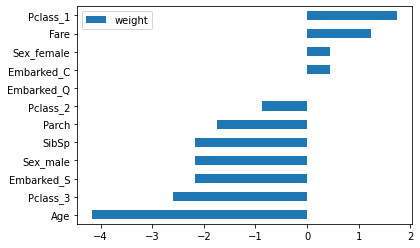

In [ ]:
## 각 특성이 얼마나 중요하게 반영되었는지를 그래프로 보기

W.sort_values('weight').plot(kind='barh')

- 위 결과를 보면 생존하는데 가장 많이 기여한 변수는 여성, 요금, 1등석 등이고
- 생존하지 않는데 가장 많이 기여한 변수는 남성, 나이, 3등객실 등인 것을 알 수 있다

In [ ]:
X_new = X[['Fare','Sex_female']]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=8, shuffle=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7374301675977654

In [ ]:
list(X.columns)

['Age',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Fare',
 'Parch',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'SibSp']

In [ ]:
import itertools
list(itertools.combinations(list(X.columns),2))

[('Age', 'Embarked_C'),
 ('Age', 'Embarked_Q'),
 ('Age', 'Embarked_S'),
 ('Age', 'Fare'),
 ('Age', 'Parch'),
 ('Age', 'Pclass_1'),
 ('Age', 'Pclass_2'),
 ('Age', 'Pclass_3'),
 ('Age', 'Sex_female'),
 ('Age', 'Sex_male'),
 ('Age', 'SibSp'),
 ('Embarked_C', 'Embarked_Q'),
 ('Embarked_C', 'Embarked_S'),
 ('Embarked_C', 'Fare'),
 ('Embarked_C', 'Parch'),
 ('Embarked_C', 'Pclass_1'),
 ('Embarked_C', 'Pclass_2'),
 ('Embarked_C', 'Pclass_3'),
 ('Embarked_C', 'Sex_female'),
 ('Embarked_C', 'Sex_male'),
 ('Embarked_C', 'SibSp'),
 ('Embarked_Q', 'Embarked_S'),
 ('Embarked_Q', 'Fare'),
 ('Embarked_Q', 'Parch'),
 ('Embarked_Q', 'Pclass_1'),
 ('Embarked_Q', 'Pclass_2'),
 ('Embarked_Q', 'Pclass_3'),
 ('Embarked_Q', 'Sex_female'),
 ('Embarked_Q', 'Sex_male'),
 ('Embarked_Q', 'SibSp'),
 ('Embarked_S', 'Fare'),
 ('Embarked_S', 'Parch'),
 ('Embarked_S', 'Pclass_1'),
 ('Embarked_S', 'Pclass_2'),
 ('Embarked_S', 'Pclass_3'),
 ('Embarked_S', 'Sex_female'),
 ('Embarked_S', 'Sex_male'),
 ('Embarked_S', 'SibS

In [ ]:
import itertools
all_2 = list(itertools.combinations(list(X.columns),2)) # nCr
res = []
for feature in all_2:
  X_new = X[list(feature)]
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=8, shuffle=True)
  model.fit(X_train, y_train)
  res.append((feature, model.score(X_test, y_test)))


In [ ]:
df_r = pd.DataFrame(res).set_index([0])
df_r.sort_values([1], ascending=False)

,1
0,
"(Parch, Sex_female)",0.743017
"(Fare, Sex_male)",0.737430
"(Pclass_2, Sex_male)",0.737430
"(Parch, Sex_male)",0.737430
"(Pclass_1, Sex_female)",0.737430
...,...
"(Age, SibSp)",0.569832
"(Age, Parch)",0.463687
"(Embarked_C, SibSp)",0.435754
